In [1]:
import numpy as np
import cv2 as cv
from src.lic import *
import os
from matplotlib import pyplot as plt

In [2]:
test_img = './temp/test2.jpg'

In [3]:
img = cv.imread(test_img)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_lab = cv.cvtColor(img, cv.COLOR_RGB2LAB)
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

In [4]:
labels, label_counts = label_regions(img_lab, img_lab.shape[0] * img_lab.shape[1] // 8)
vec = extract_region_vector_field(img_gray, labels, label_counts)
im_noise = generate_noise_image(img_gray, labels, label_counts)

D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


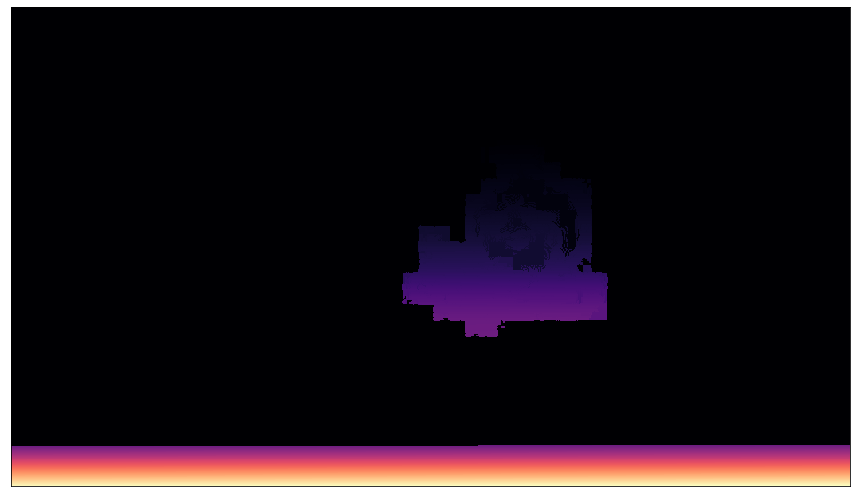

In [5]:
figure = plt.figure(figsize=(12,12))
plt.set_cmap('magma')
plt.imshow(labels)
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)
plt.tight_layout()


In [ ]:
figure = plt.figure(figsize=(12,12))
plt.set_cmap('hot')
plt.imshow(im_noise)
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)
plt.tight_layout()


In [ ]:
figure = plt.figure(figsize=(12,12))
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)
plt.imshow(img)
X, Y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
skip = 10
#plt.quiver(X[::skip, ::skip], Y[::skip, ::skip], vec[::skip, ::skip, 1], vec[::skip, ::skip, 0])
plt.streamplot(X, Y, vec[:, :, 1], vec[:, :, 0], density=(2, 2))
plt.tight_layout()
